

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Here we have two kind of data files..

1. Data info file----- lending_club_info.csv
2. Data file...---------lending_club_loan_two.csv

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data file  and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
# This is data file..

df = pd.read_csv('../DATA/lending_club_loan_two.csv')  

In [8]:
## by this code we will get what are the columns we have... 
# which columns are null and what type of obj

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  



# Exploratory Data Analysis

Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

In [9]:
# CODE HERE

## Show the counts of observations in each categorical bin using bars.

#seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, 
#            saturation=0.75, dodge=True, ax=None, **kwargs)

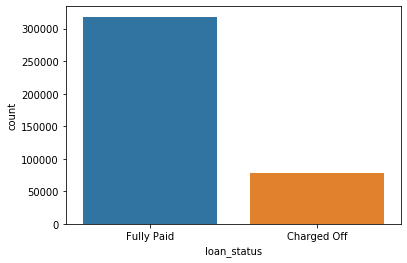

In [10]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

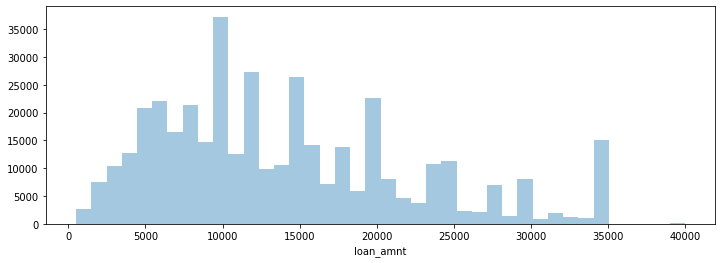

In [11]:
## Defination 
## TO displaying the distribution and range of data values over a scale.

# CODE HERE
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [12]:
## Correlation... 

## is used to find the pairwise correlation of all columns in the dataframe. 
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035




* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

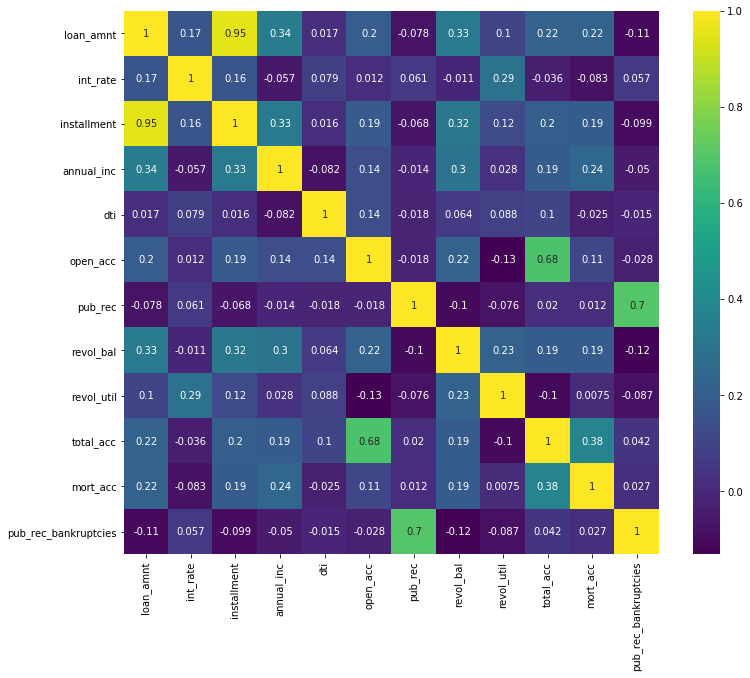

In [13]:
# CODE HERE
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [14]:
# CODE HERE
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
## From the data set we observed there was two columns have high correlations... i.e., Loan_amnt and installment... 

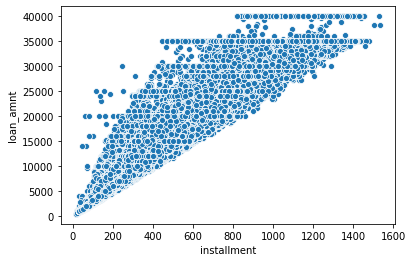

In [16]:
sns.scatterplot(x='installment',y = 'loan_amnt',data=df)  ## Scatter plot...

##### boxplot showing the relationship between the loan_status and the Loan Amount.**

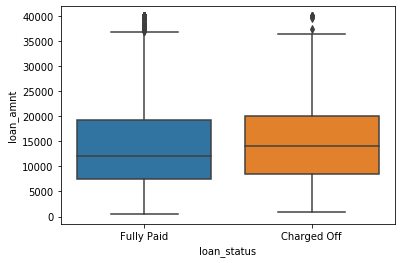

In [17]:
# CODE HERE

sns.boxplot(x='loan_status',y='loan_amnt',data=df)

#### Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [18]:
# CODE HERE

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


## 

In [19]:
# CODE HERE

df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [21]:
feat_info('sub_grade')

LC assigned loan subgrade


###

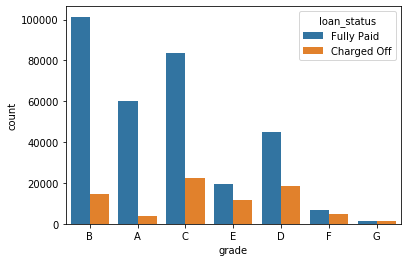

In [22]:
# CODE HERE

sns.countplot(x='grade',data=df,hue='loan_status')

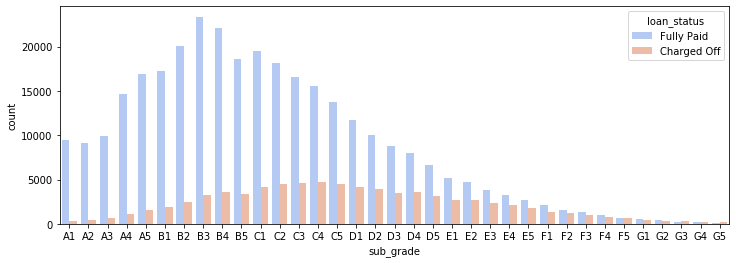

In [23]:
#CODE HERE
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',
             hue='loan_status')

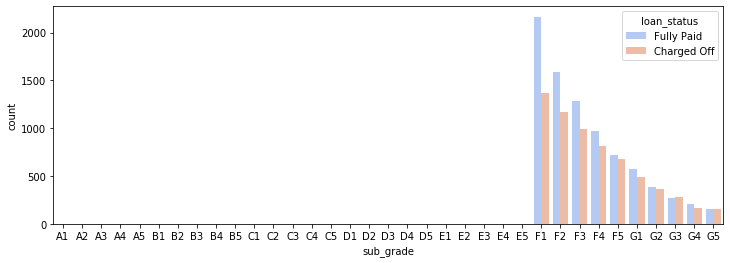

In [24]:
#CODE HERE

f_and_g = df[(df['grade'] == 'G')| (df['grade']=='F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=subgrade_order,palette='coolwarm',
             hue='loan_status')

In [25]:
# CODE HERE

df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


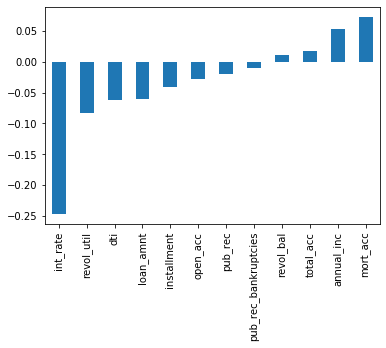

In [27]:
#CODE HERE

df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
###### Data PreProcessing




In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


# Missing Data


In [29]:
# CODE HERE
len(df)


396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [30]:
# CODE HERE
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### from below we are calculating what column missing how much % of data... 

In [31]:
# CODE HERE
100 * df.isnull().sum()/len(df)

## Conclusion: There are 6 columns are missing some kind of % in that 
## mort_acc  >> emp_title >> emp_length >>title >> pub_rec_bankruptcies >> revol_util               

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [32]:
# CODE HERE
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [33]:
# CODE HERE
df['emp_title'].nunique()

173105

In [34]:
df['emp_title'].value_counts()

Teacher                                  4389
Manager                                  4250
Registered Nurse                         1856
RN                                       1846
Supervisor                               1830
                                         ... 
SHULTS FORD LINCOLN INC                     1
Projects Accountant                         1
El Paso Fire Department - Firefighter       1
Lead Backup Engineer                        1
STATION COMMANDER R&R NCO                   1
Name: emp_title, Length: 173105, dtype: int64

In [35]:
## From above... we got the unique number of job titles... and count too.. 
## In every job title we too high on unique job titles....
## so we concluded that there is no use of emp_title.. so we are removing those...

In [36]:
# CODE HERE
df = df.drop('emp_title',axis=1)


In [37]:
# now we have to maintian the countplot of all the emp_lenght....
## and we soreted all the emp_length 

In [38]:
# CODE HERE

sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
empl_length_order = ['< 1 year','1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years', ]

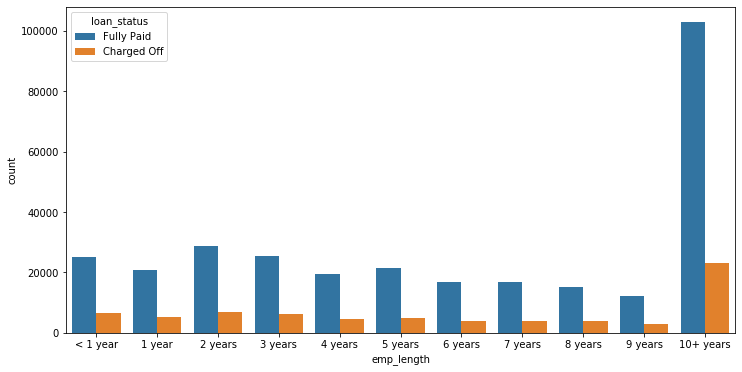

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',data=df,order=empl_length_order,hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [41]:
## Now we are looking into is there any relation between emp_length to Charged Off depedna on Loan_status

In [42]:
df[df['loan_status'] == 'Charged Off'].groupby("emp_length").count()['loan_status']

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [43]:
df[df['loan_status'] == 'Charged Off']

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
25,6000.0,36 months,11.36,197.47,B,B5,2 years,RENT,46680.0,Not Verified,...,0.0,4370.0,40.1,10.0,f,INDIVIDUAL,NaN,0.0,"44130 Powers Course Suite 880\r\nEast Preston,...",0
26,8400.0,36 months,13.35,284.45,C,C2,6 years,RENT,35000.0,Source Verified,...,0.0,6953.0,74.8,17.0,f,INDIVIDUAL,0.0,0.0,Unit 3166 Box 1862\r\nDPO AE 48052,0
36,3250.0,36 months,16.78,115.52,C,C5,NaN,RENT,22500.0,Verified,...,0.0,7587.0,54.6,7.0,f,INDIVIDUAL,0.0,0.0,"361 Erica Forest\r\nLake Mariaton, TN 30723",0
41,28000.0,60 months,19.91,312.04,E,E4,10+ years,RENT,52000.0,Verified,...,0.0,29178.0,87.6,16.0,f,INDIVIDUAL,NaN,0.0,"5836 Garcia Falls Apt. 525\r\nMatthewtown, CT ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396000,10000.0,36 months,12.85,336.22,B,B4,10+ years,MORTGAGE,95000.0,Source Verified,...,1.0,5718.0,57.8,37.0,w,INDIVIDUAL,6.0,1.0,"66798 Jessica Avenue Apt. 921\r\nPort Angela, ...",0
396001,15000.0,60 months,15.61,361.67,D,D1,10+ years,MORTGAGE,47000.0,Source Verified,...,0.0,4621.0,55.0,15.0,w,INDIVIDUAL,1.0,0.0,"1398 Allen Mission\r\nAdrianstad, ME 22690",0
396002,17500.0,36 months,13.66,595.23,C,C3,< 1 year,RENT,70000.0,Source Verified,...,0.0,16637.0,88.0,42.0,f,INDIVIDUAL,0.0,0.0,"127 Gregory Vista\r\nFowlerville, AZ 70466",0
396011,13000.0,36 months,10.99,425.55,B,B4,10+ years,RENT,56000.0,Not Verified,...,0.0,9964.0,64.3,23.0,w,INDIVIDUAL,3.0,0.0,"7359 Stone Land\r\nWest Josefurt, SC 30723",0


In [44]:
df['loan_status']

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [45]:
df[df['loan_status'] == 'Fully Paid'].groupby("emp_length").count()['loan_status']

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [46]:
# CODE HERE
emp_co = df[df['loan_status'] == 'Charged Off'].groupby("emp_length").count()['loan_status']


In [47]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby("emp_length").count()['loan_status']

In [48]:
emp_co/emp_fp

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [49]:
emp_len = emp_co/(emp_co+emp_fp)

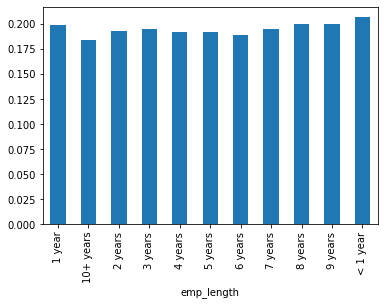

In [50]:
emp_len.plot(kind='bar')

In [51]:
df = df.drop('emp_length',axis = 1)

In [52]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [53]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [54]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


In [55]:
df['title'].head(20)

0                    Vacation
1          Debt consolidation
2     Credit card refinancing
3     Credit card refinancing
4       Credit Card Refinance
5          Debt consolidation
6            Home improvement
7        No More Credit Cards
8          Debt consolidation
9          Debt Consolidation
10         Debt Consolidation
11    Credit card refinancing
12         Debt consolidation
13         Debt consolidation
14                   Business
15             Major purchase
16         Debt consolidation
17         Debt consolidation
18         Debt consolidation
19         Debt consolidation
Name: title, dtype: object

In [56]:
df = df.drop('title',axis = 1)

In [57]:
feat_info('mort_acc')

Number of mortgage accounts.


In [58]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [59]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [60]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [61]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [62]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [63]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [64]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [65]:
df = df.dropna()

In [66]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [67]:
# Categorical and Dummpy variable

In [68]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [69]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [70]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [71]:
df['term'] = df['term'].apply(lambda term : int(term[:3]))

In [72]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [73]:
## Grade Feature:

df =df.drop('grade',axis= 1)

In [74]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

## 

df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [75]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [76]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

## 

df = pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [77]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [78]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [79]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)

## 

df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [80]:
## Address

In [81]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [82]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [83]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [84]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)

## 

df = pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [85]:
df = df.drop('address',axis =1)

In [86]:
## issue_d

In [87]:
feat_info('issue_d')

The month which the loan was funded


In [88]:
df = df.drop('issue_d',axis = 1)

In [89]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [90]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [91]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [92]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
df = df.drop('loan_status',axis=1)

In [95]:
X = df.drop('loan_repaid',axis=1).values

In [96]:
y = df['loan_repaid'].values

In [97]:
#df = df.sample(frac=0.5,random_state=101)

In [98]:
print(len(df))

395219


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [100]:
# Normalized

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
X_train = scaler.fit_transform(X_train)

In [104]:
X_test = scaler.transform(X_test)

In [105]:
## Creating Model...

In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [107]:
model = Sequential()


model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [108]:
X_train.shape

(316175, 78)

In [109]:
model.fit(x=X_train,y=y_train, epochs=25, batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3004 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2660 - val_loss: 0.2635
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2633 - val_loss: 0.2625
Epoch 4/25
1236/1236 [==============================] - 7s 6ms/step - loss: 0.2621 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2613 - val_loss: 0.2620
Epoch 6/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2606 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2602 - val_loss: 0.2614
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2596 - val_loss: 0.2610
Epoch 9/25
1236/1236 [==============================] - 3s 2ms/step - loss: 0.2592 - val_loss: 0.2618
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.258

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model.save('myfaveritemodel.h5')

In [112]:
losses = pd.DataFrame(model.history.history)

In [113]:
losses

,loss,val_loss
0,0.300363,0.265392
1,0.265954,0.263476
2,0.263305,0.262475
3,0.262105,0.262127
4,0.261332,0.261983
5,0.260622,0.261706
6,0.260222,0.261385
7,0.259610,0.260980
8,0.259234,0.261768
9,0.258809,0.261161


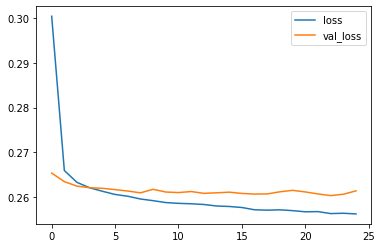

In [114]:
losses.plot()

In [115]:
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [118]:
df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [119]:
317696 /len(df)

0.8038479931379817

In [120]:
confusion_matrix(y_test,predictions)

array([[ 6762,  8896],
       [   34, 63352]], dtype=int64)

In [121]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [122]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [123]:
model.predict_classes(new_customer)

array([[1]])

In [124]:
df.iloc[random_ind]['loan_repaid']

1.0